In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('train.csv')


print("---------- First 5 Rows ----------")
print(df.head())

print("\n\n---------- Data Info ----------")
df.info()

---------- First 5 Rows ----------
   Unnamed: 0        DATE  LATITUDE_A  LONGITUDE_A  ELEVATION_A  PRCP_A  \
0           0  01-11-1979       63.88        77.52          128     NaN   
1           1  13-11-1979       63.88        77.52          128     NaN   
2           2  05-02-1980       63.88        77.52          128     NaN   
3           3  23-12-1979       63.88        77.52          128     0.0   
4           4  07-06-1977       63.88        77.52          128     NaN   

   SNWD_A  TMAX_A  TMIN_A  TAVG_A  ...  LONGITUDE_C  ELEVATION_C  PRCP_C  \
0     0.0    17.6     NaN   12.96  ...        78.93           64     0.0   
1     0.0     8.8     NaN    0.00  ...        78.93           64     0.0   
2     0.0    -9.9     NaN  -17.76  ...        78.93           64     0.0   
3     0.0     NaN   -4.30   -4.44  ...        78.93           64     0.0   
4     0.0    39.6   15.48     NaN  ...        78.93           64     NaN   

   SNWD_C  TMAX_C  TMIN_C  TAVG_C  LATITUDE  LONGITUDE  T

In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   812 non-null    int64  
 1   DATE         812 non-null    object 
 2   LATITUDE_A   812 non-null    float64
 3   LONGITUDE_A  812 non-null    float64
 4   ELEVATION_A  812 non-null    int64  
 5   PRCP_A       251 non-null    float64
 6   SNWD_A       812 non-null    float64
 7   TMAX_A       567 non-null    float64
 8   TMIN_A       289 non-null    float64
 9   TAVG_A       742 non-null    float64
 10  LATITUDE_B   812 non-null    float64
 11  LONGITUDE_B  812 non-null    float64
 12  ELEVATION_B  812 non-null    int64  
 13  PRCP_B       812 non-null    int64  
 14  SNWD_B       812 non-null    float64
 15  TMAX_B       812 non-null    float64
 16  TMIN_B       812 non-null    float64
 17  TAVG_B       742 non-null    float64
 18  LATITUDE_C   812 non-null    float64
 19  LONGITUD

Unnamed: 0       0
DATE             0
LATITUDE_A       0
LONGITUDE_A      0
ELEVATION_A      0
PRCP_A         561
SNWD_A           0
TMAX_A         245
TMIN_A         523
TAVG_A          70
LATITUDE_B       0
LONGITUDE_B      0
ELEVATION_B      0
PRCP_B           0
SNWD_B           0
TMAX_B           0
TMIN_B           0
TAVG_B          70
LATITUDE_C       0
LONGITUDE_C      0
ELEVATION_C      0
PRCP_C         207
SNWD_C           0
TMAX_C         239
TMIN_C         471
TAVG_C         129
LATITUDE         0
LONGITUDE        0
TAVG             0
dtype: int64

In [3]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)

df = df.set_index('DATE')

print("---------- Data Info After Cleaning ----------")
df.info()

print("\n\n---------- Null Values Count After Cleaning ----------")
print(df.isnull().sum())

---------- Data Info After Cleaning ----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 812 entries, 1979-11-01 to 1978-02-28
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LATITUDE_A   812 non-null    float64
 1   LONGITUDE_A  812 non-null    float64
 2   ELEVATION_A  812 non-null    int64  
 3   PRCP_A       812 non-null    float64
 4   SNWD_A       812 non-null    float64
 5   TMAX_A       812 non-null    float64
 6   TMIN_A       812 non-null    float64
 7   TAVG_A       812 non-null    float64
 8   LATITUDE_B   812 non-null    float64
 9   LONGITUDE_B  812 non-null    float64
 10  ELEVATION_B  812 non-null    int64  
 11  PRCP_B       812 non-null    int64  
 12  SNWD_B       812 non-null    float64
 13  TMAX_B       812 non-null    float64
 14  TMIN_B       812 non-null    float64
 15  TAVG_B       812 non-null    float64
 16  LATITUDE_C   812 non-null    float64
 17  LONGITUDE_C  812 non-null 

---------- Correlation with Target (TAVG) ----------
TAVG           1.000000
TMIN_B         0.825619
TAVG_A         0.823820
TMAX_B         0.803509
TAVG_C         0.766611
TMAX_A         0.743961
TAVG_B         0.691087
TMAX_C         0.664578
TMIN_C         0.567431
TMIN_A         0.447277
month          0.325725
dayofyear      0.320315
PRCP_A         0.035030
SNWD_C         0.006810
SNWD_A        -0.001652
year          -0.030676
SNWD_B        -0.050085
PRCP_B        -0.056019
PRCP_C        -0.078737
LATITUDE_A          NaN
LONGITUDE_A         NaN
ELEVATION_A         NaN
LATITUDE_B          NaN
LONGITUDE_B         NaN
ELEVATION_B         NaN
LATITUDE_C          NaN
LONGITUDE_C         NaN
ELEVATION_C         NaN
LATITUDE            NaN
LONGITUDE           NaN
Name: TAVG, dtype: float64


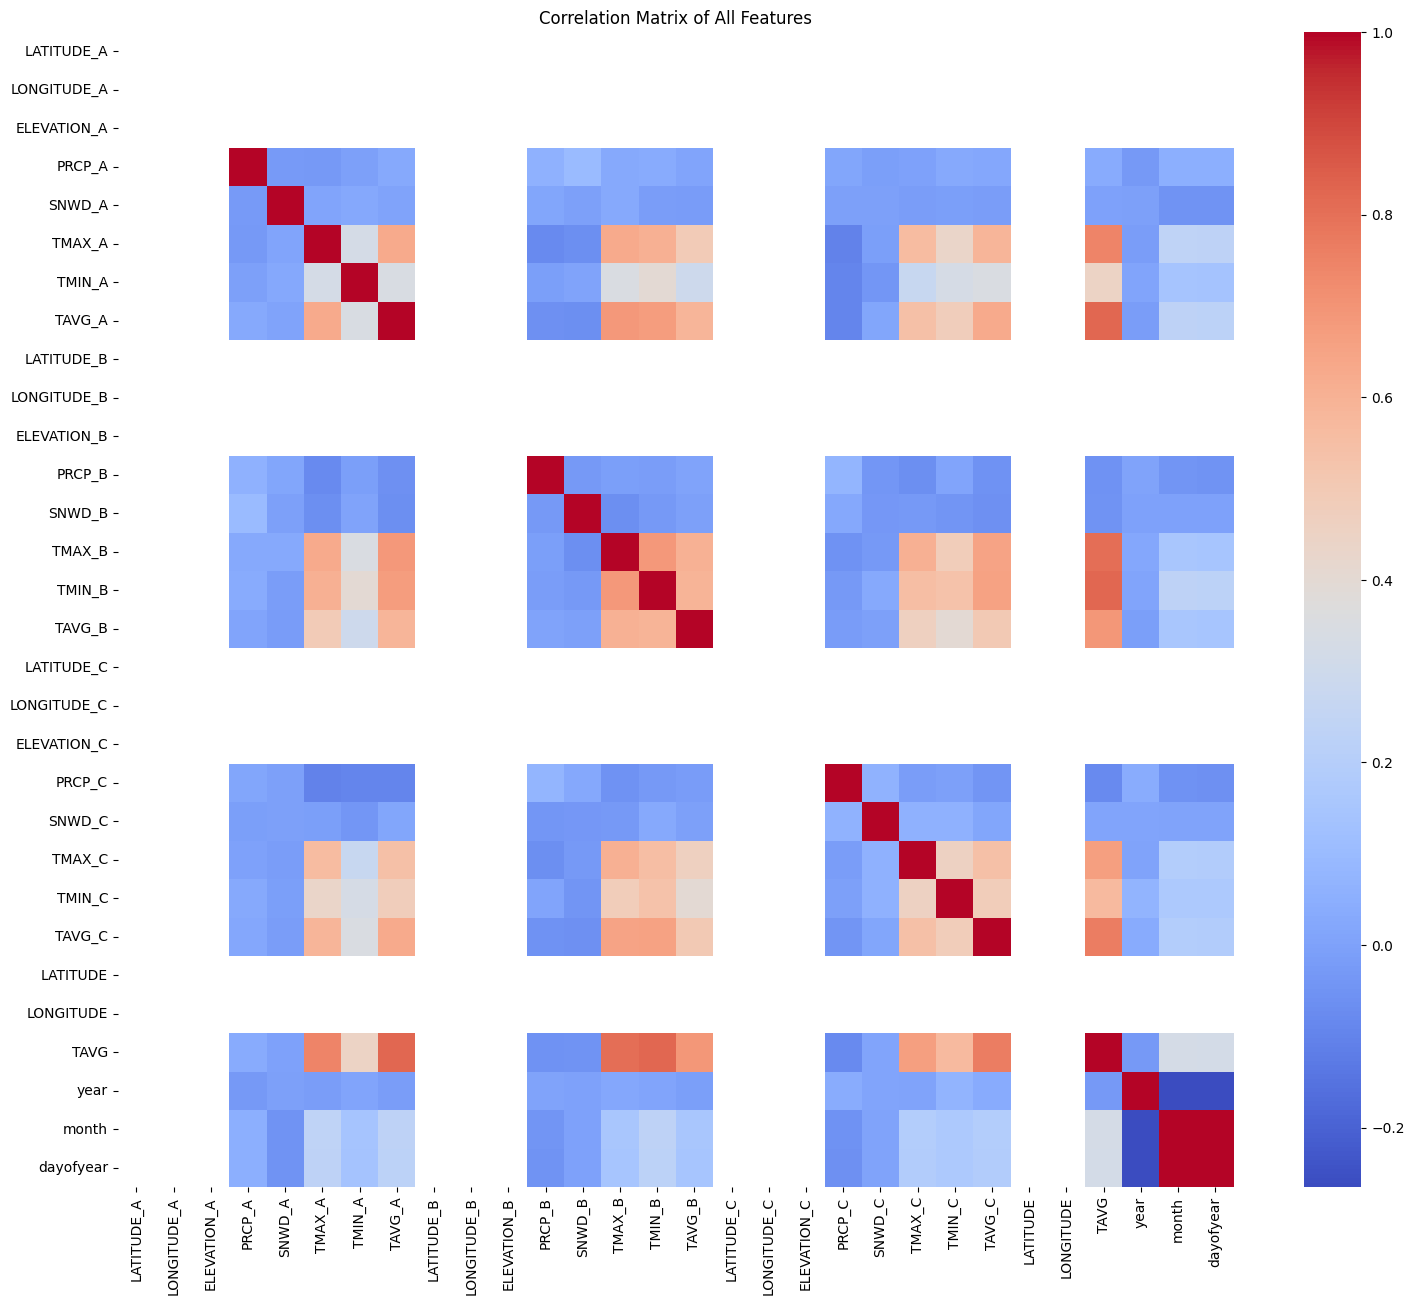

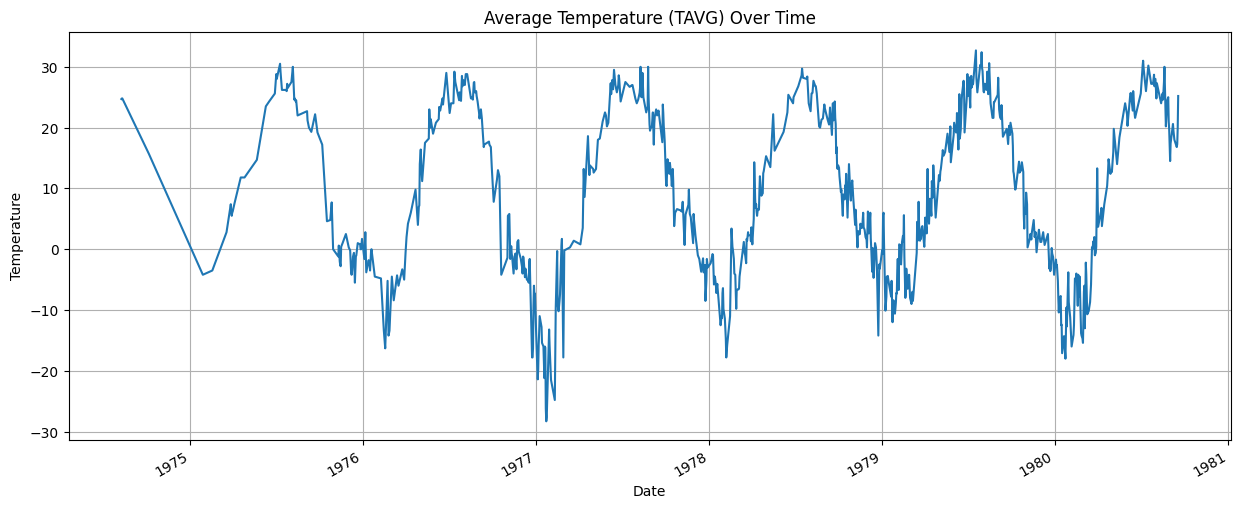

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

corr_matrix = df.corr()
print("---------- Correlation with Target (TAVG) ----------")
print(corr_matrix['TAVG'].sort_values(ascending=False))


plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

plt.figure(figsize=(15, 6))
df['TAVG'].plot()
plt.title('Average Temperature (TAVG) Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [5]:


selected_features = [
    'TMAX_A', 'TMIN_A', 'TAVG_A',
    'TMAX_B', 'TMIN_B', 'TAVG_B',
    'TMAX_C', 'TMIN_C', 'TAVG_C',
    'year', 'month', 'dayofyear'
]

X = df[selected_features]
y = df['TAVG']

print("---------- Selected Features (X) ----------")
print(X.head())

print("\n\n---------- Target Variable (y) ----------")
print(y.head())

---------- Selected Features (X) ----------
               TMAX_A     TMIN_A     TAVG_A  TMAX_B  TMIN_B  TAVG_B  \
DATE                                                                  
1979-11-01  17.600000   8.385779  12.960000   17.12   29.84    9.90   
1979-11-13   8.800000   8.385779   0.000000   10.49   -4.64    1.10   
1980-02-05  -9.900000   8.385779 -17.760000   -9.31  -17.52  -17.60   
1979-12-23  17.127795  -4.300000  -4.440000    0.64   -3.20   -2.75   
1977-06-07  39.600000  15.480000  12.793423   38.31   13.36   29.48   

               TMAX_C     TMIN_C     TAVG_C  year  month  dayofyear  
DATE                                                                 
1979-11-01  18.700000   5.001261  14.354319  1979     11        305  
1979-11-13  11.000000  -3.800000   2.040000  1979     11        317  
1980-02-05  22.335951   5.001261 -16.560000  1980      2         36  
1979-12-23   0.000000   5.001261  -2.640000  1979     12        357  
1977-06-07  38.500000  17.100000  33.0

---------- Model Evaluation Results ----------
Mean Absolute Error (MAE): 1.78
Root Mean Squared Error (RMSE): 2.89
R-squared (R2 Score): 0.96
--------------------------------------------


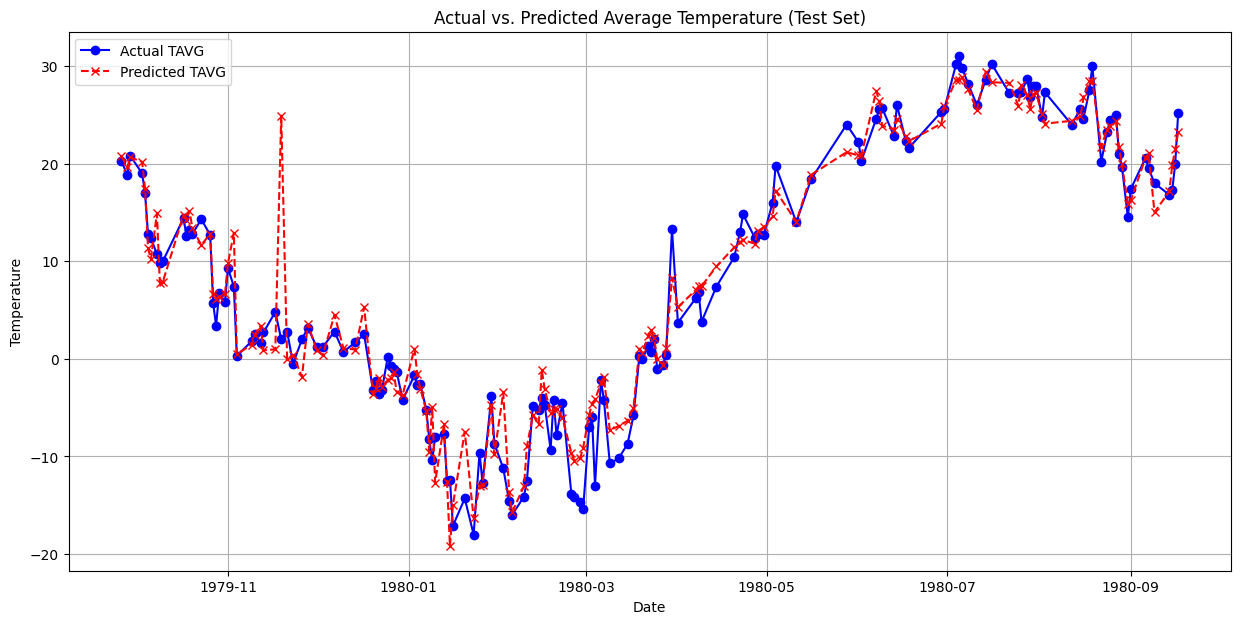

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = X.sort_index()
y = y.sort_index()


split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("---------- Model Evaluation Results ----------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")
print("--------------------------------------------")


plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual TAVG', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted TAVG', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Average Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1459
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 12
[LightGBM] [Info] Start training from score 8.825424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

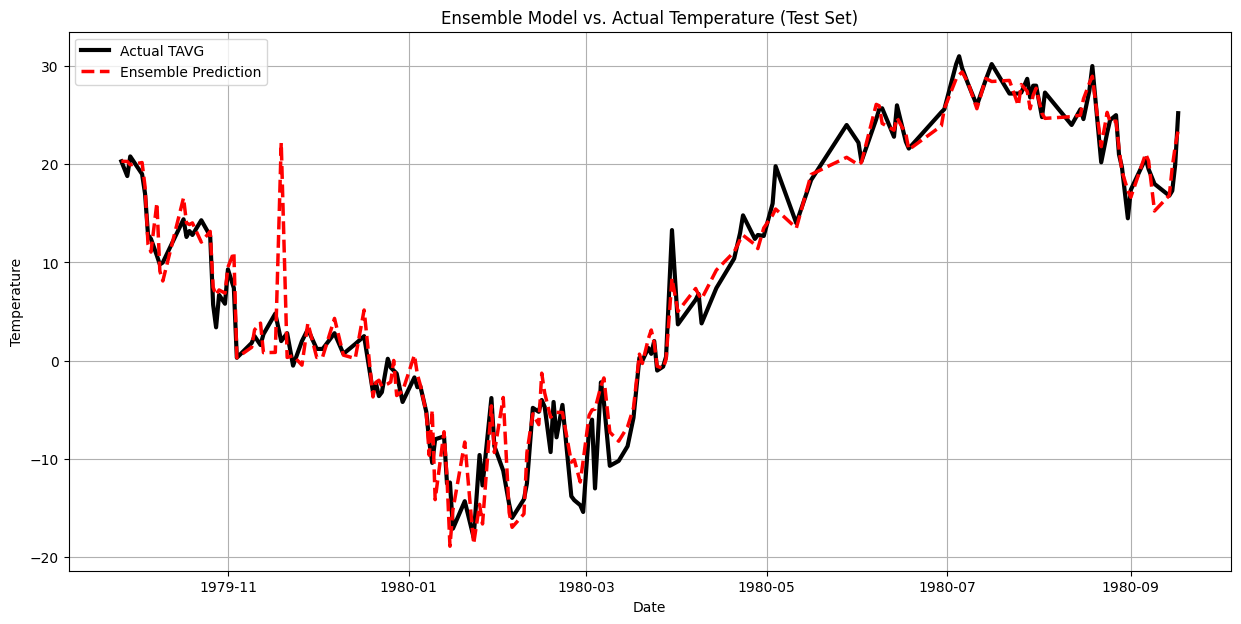

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
for col in df.columns:
    if df[col].isnull().any() and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
df = df.set_index('DATE')
df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
selected_features = [
    'TMAX_A', 'TMIN_A', 'TAVG_A', 'TMAX_B', 'TMIN_B', 'TAVG_B',
    'TMAX_C', 'TMIN_C', 'TAVG_C', 'year', 'month', 'dayofyear'
]
X = df[selected_features]
y = df['TAVG']
X = X.sort_index()
y = y.sort_index()
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
lgb_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
lgb_pred = lgb_model.predict(X_test_scaled)

ensemble_pred = (rf_pred + xgb_pred + lgb_pred) / 3

print("---------- Model Evaluation Results ----------\n")

r2_rf = r2_score(y_test, rf_pred)
print(f"Random Forest R2 Score: {r2_rf:.4f}")

r2_xgb = r2_score(y_test, xgb_pred)
print(f"XGBoost R2 Score:       {r2_xgb:.4f}")

r2_lgb = r2_score(y_test, lgb_pred)
print(f"LightGBM R2 Score:      {r2_lgb:.4f}")

r2_ensemble = r2_score(y_test, ensemble_pred)
print(f"Ensemble R2 Score:      {r2_ensemble:.4f} <--- Final Model")

print("\n--------------------------------------------\n")

mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
print(f"Ensemble Mean Absolute Error (MAE): {mae_ensemble:.2f}")


plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual TAVG', color='black', linewidth=3)
plt.plot(y_test.index, ensemble_pred, label='Ensemble Prediction', color='red', linestyle='--', linewidth=2.5)

plt.title('Ensemble Model vs. Actual Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 12
[LightGBM] [Info] Start training from score 9.028902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

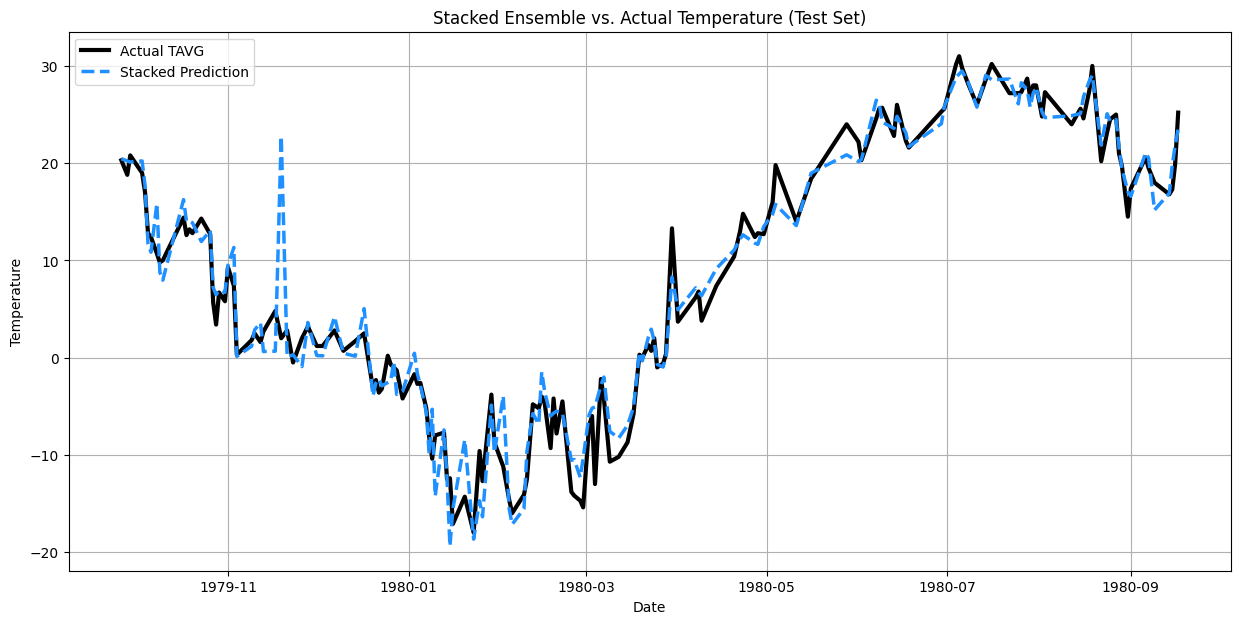

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv('train.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
for col in df.columns:
    if df[col].isnull().any() and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
df = df.set_index('DATE')
df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
selected_features = [
    'TMAX_A', 'TMIN_A', 'TAVG_A', 'TMAX_B', 'TMIN_B', 'TAVG_B',
    'TMAX_C', 'TMIN_C', 'TAVG_C', 'year', 'month', 'dayofyear'
]
X = df[selected_features]
y = df['TAVG']
X = X.sort_index()
y = y.sort_index()
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
base_models = [('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
meta_features_train = np.zeros((X_train_scaled.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test_scaled.shape[0], len(base_models)))


for i, (name, model) in enumerate(base_models):
    for train_idx, val_idx in kf.split(X_train_scaled):
        model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        meta_features_train[val_idx, i] = model.predict(X_train_scaled[val_idx])


for i, (name, model) in enumerate(base_models):
    model.fit(X_train_scaled, y_train)
    meta_features_test[:, i] = model.predict(X_test_scaled)

meta_train_df = pd.DataFrame(meta_features_train, columns=[name for name, _ in base_models])
meta_test_df = pd.DataFrame(meta_features_test, columns=[name for name, _ in base_models])

print("---------- Meta-Features for Training Data (First 5 Rows) ----------")
print(meta_train_df.head())
print("\n")

meta_model = LinearRegression()
meta_model.fit(meta_train_df, y_train)

stacked_pred = meta_model.predict(meta_test_df)

r2_stacked = r2_score(y_test, stacked_pred)
mae_stacked = mean_absolute_error(y_test, stacked_pred)

print("---------- Stacking Ensemble Evaluation ----------")
print(f"Final Stacked Model R2 Score: {r2_stacked:.4f}")
print(f"Final Stacked Model MAE:      {mae_stacked:.4f}")
print("-------------------------------------------------")

plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual TAVG', color='black', linewidth=3)
plt.plot(y_test.index, stacked_pred, label='Stacked Prediction', color='dodgerblue', linestyle='--', linewidth=2.5)
plt.title('Stacked Ensemble vs. Actual Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

🚀 Starting Hyperparameter Tuning for LightGBM...


/tmp/ipykernel_72090/963180474.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 515, number of used features: 25
[LightGBM] [Info] Start training from score 9.793981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

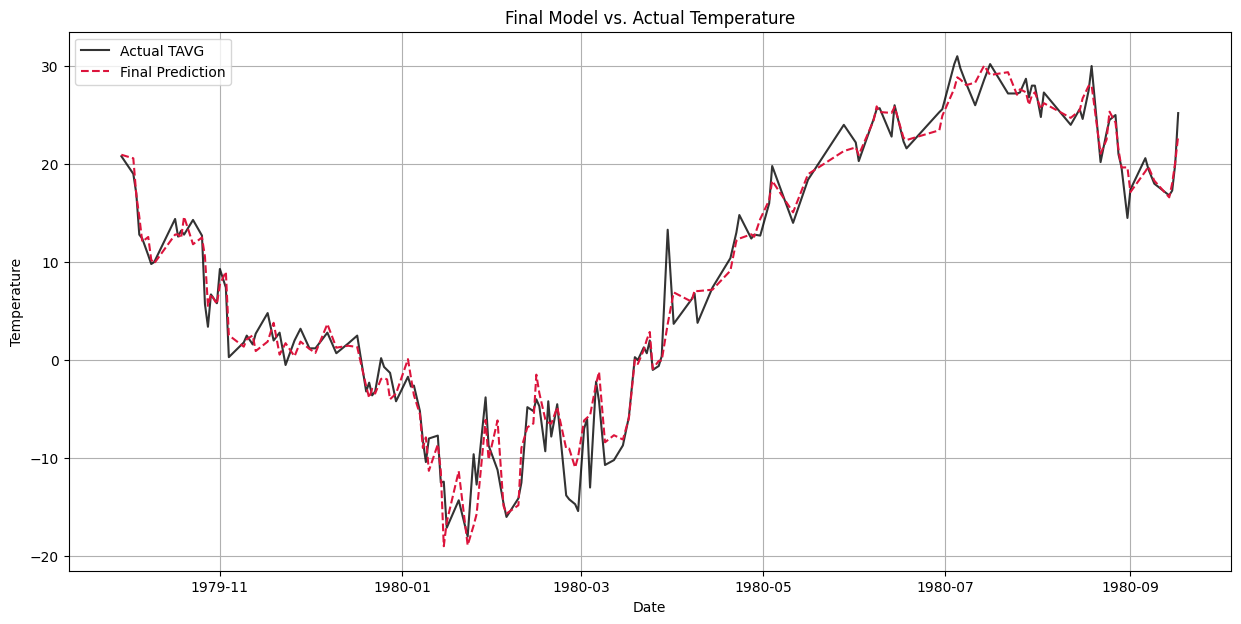

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import randint, uniform

df = pd.read_csv('train.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df = df.set_index('DATE').sort_index()

for col in df.columns:
    if df[col].isnull().any() and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(method='ffill').fillna(method='bfill')

df['TAVG_lag_1'] = df['TAVG'].shift(1)
df['TAVG_lag_3'] = df['TAVG'].shift(3)
df['TAVG_lag_7'] = df['TAVG'].shift(7)

df['TAVG_rolling_mean_7'] = df['TAVG'].rolling(window=7).mean()
df['TAVG_rolling_std_7'] = df['TAVG'].rolling(window=7).std()

df['year'] = df.index.year
df['month_sin'] = np.sin(2 * np.pi * df.index.month/12)
df['month_cos'] = np.cos(2 * np.pi * df.index.month/12)
df['dayofyear_sin'] = np.sin(2 * np.pi * df.index.dayofyear/365.25)
df['dayofyear_cos'] = np.cos(2 * np.pi * df.index.dayofyear/365.25)

df = df.dropna()

X = df.drop('TAVG', axis=1)
y = df['TAVG']

split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🚀 Starting Hyperparameter Tuning for LightGBM...")
param_dist = {
    'n_estimators': randint(150, 500),
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': randint(20, 50),
    'max_depth': [-1, 10, 20],
    'reg_alpha': uniform(0.1, 0.9),
    'reg_lambda': uniform(0.1, 0.9)
}
lgb_model_tune = lgb.LGBMRegressor(random_state=42)
random_search = RandomizedSearchCV(
    lgb_model_tune, param_distributions=param_dist, n_iter=50, cv=5,
    scoring='r2', random_state=42, n_jobs=-1, verbose=0
)
random_search.fit(X_train_scaled, y_train)

best_lgb_model = random_search.best_estimator_
print(f"✅ Tuning complete. Best R2 score from search: {random_search.best_score_:.4f}")

print("\n💪 Training final models...")
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

best_lgb_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

lgb_pred = best_lgb_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

final_pred = (lgb_pred + xgb_pred + rf_pred) / 3

r2_final = r2_score(y_test, final_pred)
mae_final = mean_absolute_error(y_test, final_pred)

print("\n\n--- 🏆 FINAL MODEL PERFORMANCE 🏆 ---")
print(f"Final Ensemble R2 Score: {r2_final:.4f}")
print(f"Final Ensemble MAE:      {mae_final:.4f}")
print("------------------------------------")


plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual TAVG', color='black', alpha=0.8)
plt.plot(y_test.index, final_pred, label='Final Prediction', color='crimson', linestyle='--')
plt.title('Final Model vs. Actual Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()